In [2]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import random
import numpy as np
from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn import preprocessing
from pathlib import Path
import scipy.io
import py_pcha
import time
from sklearn.decomposition import NMF
import os
import warnings
import cv2
warnings.filterwarnings('ignore')

In [12]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img.flatten())
    return images


In [13]:
images = load_images_from_folder("crop_part1")
images = np.array(images)

In [18]:
test_images = images[:200]

In [20]:
n_components = 25

estimator = decomposition.NMF(n_components = n_components, init = 'random', tol=5e-3)    
W = estimator.fit_transform(images)


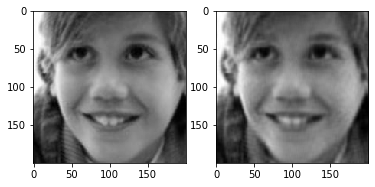

In [10]:
vmax = max(gray_image.max(), -gray_image.min())

fig, (ax, ax2)  =plt.subplots(ncols=2)    
ax.imshow(gray_image, cmap=plt.cm.gray, interpolation = 'nearest',vmin=-vmax,vmax=vmax)

H = estimator.components_

new_img = np.dot(W,H)
ax2.imshow(new_img, cmap=plt.cm.gray,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)


In [85]:
image_shape = (10, 20, n_components)
comps = np.reshape(W,image_shape)

In [90]:
outer = gridspec.GridSpec(1, 2, wspace=0.2, hspace=0.2)
inner = gridspec.GridSpecFromSubplotSpec(5, 5, subplot_spec=outer[0], wspace=0.1, hspace=0.1)

In [93]:
ax.set_title('Features extracted by NMF LS')
ax.axis('off')
fig.add_subplot(ax)
for i in range(n_components):
    comp = comps[:,:,i]
    ax = plt.Subplot(fig, inner[i])
    # normalize colormap
    vmax = max(comp.max(), -comp.min())
    ax.imshow(comp, cmap=plt.cm.gray, interpolation='nearest', vmin=-vmax, vmax=vmax)
    ax.set_xticks([])
    ax.set_yticks([])
    fig.add_subplot(ax)

<function matplotlib.pyplot.show(close=None, block=None)>

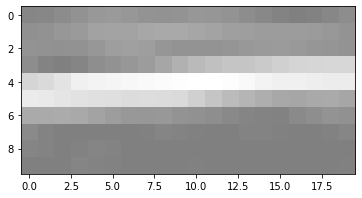

In [104]:
vmax = max(gray_image.max(), -gray_image.min())

comp = comps[:,:,0]
vmax = max(comp.max(), -comp.min())
plt.imshow(comp, cmap=plt.cm.gray, interpolation='nearest', vmin=-vmax, vmax=vmax)
plt.show